In [8]:
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
# !pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
import sklearn
import autosklearn.regression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

def scale_min_max(data, x):
    # print(data)
    # print(x)
    return (x - data.min())/(data.max() - data.min())

def scale_Z(data, x):
    # print(data)
    # print(x)
    return (x - data.mean())/(data.std())


In [2]:
graph_pkl = "/home/unibas/boittier/fdcm_project/mdcms/methanol/H.obj" 
G = pd.read_pickle(graph_pkl)

def get_neighbours_weights(i):
    edges = G.edges(2495)
    e_node = []
    e_weight = []
    for e in edges:
        e_node.append(e[1])
        e_weight.append(G.get_edge_data(*e)["weight"])
    
    return (e_node, e_weight)

In [3]:
get_neighbours_weights(2495)

([2060, 2449], [0.33024969882648764, 0.3151386108918748])

In [38]:
df = pd.read_pickle("data/fmdcm_test_4.obj")

In [39]:
lcs_df = pd.DataFrame(dict(df["lcs"])).T
rename = {i: f"q{i//3}ax{i%3}" for i in range(30)}
lcs_df.rename(columns=rename, inplace=True)
uptri_df = pd.DataFrame(dict(df["uptriDM"])).T

test = uptri_df.join(lcs_df)
test

,0,1,2,3,4,5,6,7,8,9,...,q6ax2,q7ax0,q7ax1,q7ax2,q8ax0,q8ax1,q8ax2,q9ax0,q9ax1,q9ax2
1000,0.059163,0.0,0.629436,0.556109,0.651140,0.405136,0.127678,0.150973,0.148086,0.738199,...,0.061939,0.129516,-0.055037,0.316001,-0.084332,-0.036695,0.062737,-0.100433,0.084794,0.060471
1001,0.056858,0.0,0.689989,0.523200,0.627354,0.418212,0.164532,0.104988,0.093696,0.583685,...,0.049707,0.096198,-0.002244,0.251105,-0.055118,-0.009382,0.059145,-0.188991,0.033626,0.147775
1005,0.077935,0.0,0.533889,0.562519,0.561333,0.403109,0.114980,0.159409,0.061717,0.907845,...,-0.044560,0.069957,0.009641,0.177532,-0.090271,0.037980,0.204436,-0.224607,0.012542,0.175803
1019,0.057620,0.0,0.606909,0.646125,0.696281,0.438343,0.141779,0.121502,0.144871,1.000000,...,0.063010,-0.031806,0.037991,0.082966,0.001328,0.039601,0.104470,-0.327685,-0.034830,0.231369
1004,0.086339,0.0,0.721862,0.537112,0.738398,0.445498,0.172635,0.091614,0.189466,0.687639,...,0.041361,0.173968,0.017397,0.294733,-0.100320,-0.045548,0.095826,-0.182639,0.083600,0.079676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.056232,0.0,0.664765,0.687115,0.574811,0.451251,0.121503,0.131056,0.110763,0.802825,...,-0.075284,0.065619,-0.128679,0.130863,-0.163833,0.084053,0.315530,-0.092861,0.006129,0.150162
941,0.120441,0.0,0.734248,0.595425,0.753378,0.439847,0.203208,0.152325,0.219085,0.772250,...,0.021382,0.162799,0.014990,0.240343,-0.093889,-0.045849,0.112399,-0.180846,0.089769,0.125346
940,0.089306,0.0,0.714122,0.756071,0.533139,0.445872,0.153227,0.201590,0.082539,0.682123,...,0.027379,0.064746,-0.040522,0.136548,-0.134349,0.063506,0.241985,-0.182540,0.021212,0.081152
93,0.088486,0.0,0.708324,0.558193,0.658016,0.423129,0.182827,0.135064,0.127723,0.571749,...,-0.014682,0.113443,-0.035713,0.287007,-0.076086,-0.020002,0.107907,-0.153294,0.038988,0.151745


In [40]:
uptri_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1000,0.059163,0.0,0.629436,0.556109,0.651140,0.405136,0.127678,0.150973,0.148086,0.738199,1.000000,0.526981,0.443001,0.340585,0.389438
1001,0.056858,0.0,0.689989,0.523200,0.627354,0.418212,0.164532,0.104988,0.093696,0.583685,1.000000,0.736446,0.357593,0.299785,0.446251
1005,0.077935,0.0,0.533889,0.562519,0.561333,0.403109,0.114980,0.159409,0.061717,0.907845,1.000000,0.439819,0.235978,0.445469,0.336238
1019,0.057620,0.0,0.606909,0.646125,0.696281,0.438343,0.141779,0.121502,0.144871,1.000000,0.868139,0.447020,0.480942,0.280706,0.378760
1004,0.086339,0.0,0.721862,0.537112,0.738398,0.445498,0.172635,0.091614,0.189466,0.687639,1.000000,0.635417,0.504865,0.222979,0.483783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.056232,0.0,0.664765,0.687115,0.574811,0.451251,0.121503,0.131056,0.110763,0.802825,0.541610,1.000000,0.293806,0.426936,0.335797
941,0.120441,0.0,0.734248,0.595425,0.753378,0.439847,0.203208,0.152325,0.219085,0.772250,1.000000,0.591750,0.474741,0.326402,0.433514
940,0.089306,0.0,0.714122,0.756071,0.533139,0.445872,0.153227,0.201590,0.082539,0.682123,0.722209,1.000000,0.266892,0.502907,0.434760
93,0.088486,0.0,0.708324,0.558193,0.658016,0.423129,0.182827,0.135064,0.127723,0.571749,1.000000,0.765928,0.367392,0.291559,0.467368


Train R2 score: 0.17128605288069587
Test R2 score: 0.03969623697157498


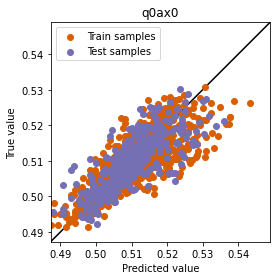

Train R2 score: 0.8464171590994486
Test R2 score: 0.761766971222153


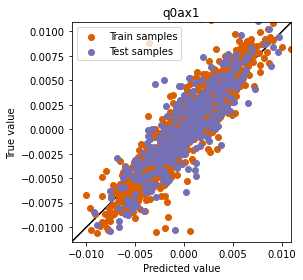

Train R2 score: 0.5456200059323133
Test R2 score: 0.38348278325666807


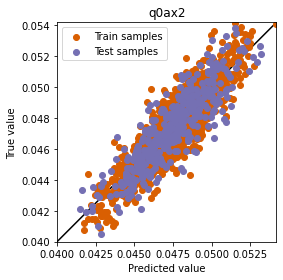

Train R2 score: 0.6858837290831825
Test R2 score: 0.518540764043296


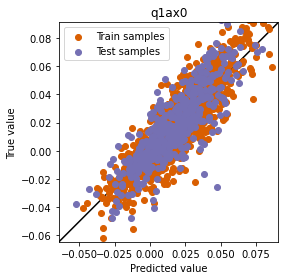

Train R2 score: 0.8619609107375585
Test R2 score: 0.7847566963636992


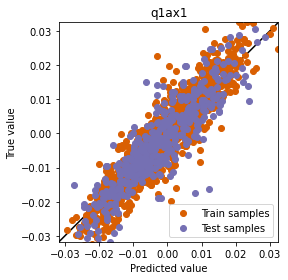

Train R2 score: 0.19575746711659503
Test R2 score: 0.04532096000989139


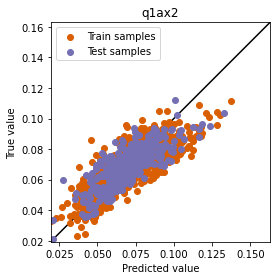

Train R2 score: 0.2761139583317742
Test R2 score: 0.13402487432639376


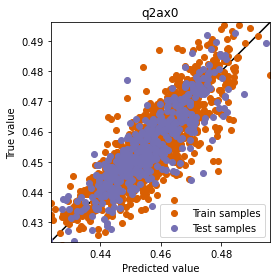

Train R2 score: 0.592714934963443
Test R2 score: 0.4165278506838136


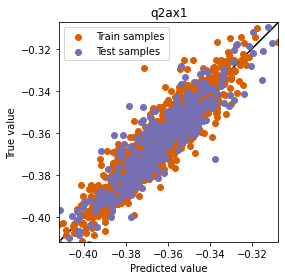

Train R2 score: 0.4016147594747842
Test R2 score: 0.2395652435092307


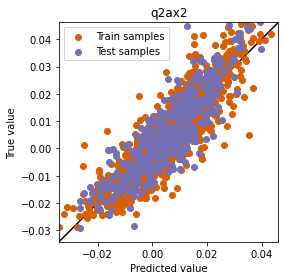

Train R2 score: 0.2617090225876405
Test R2 score: 0.13658561006205383


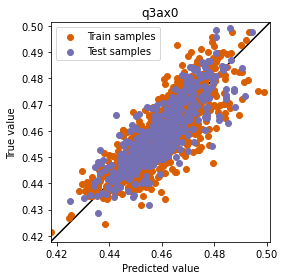

Train R2 score: 0.5494759076172075
Test R2 score: 0.38710592358398577


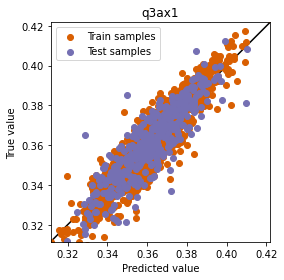

Train R2 score: 0.8446881561162156
Test R2 score: 0.8150602541088239


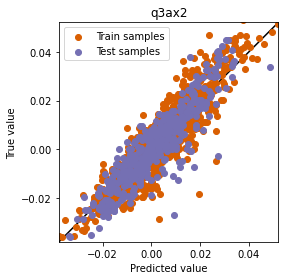

Train R2 score: 0.7309378437031202
Test R2 score: 0.7245178180304841


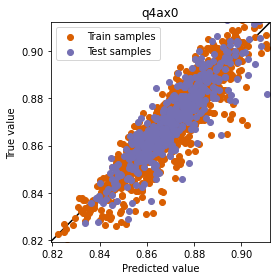

Train R2 score: 0.8912335136931874
Test R2 score: 0.8662628804564977


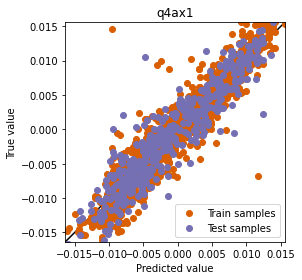

Train R2 score: 0.708698556219411
Test R2 score: 0.6429305197313382


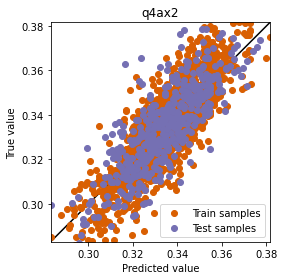

Train R2 score: 0.5401661566495627
Test R2 score: 0.4643478351475161


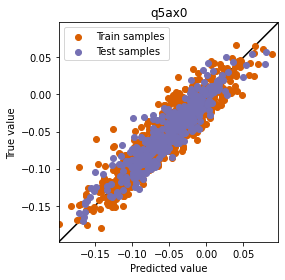

Train R2 score: 0.1543014973327249
Test R2 score: 0.050668833931555524


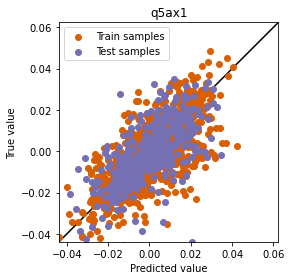

Train R2 score: 0.5346175418480555
Test R2 score: 0.42289921113248286


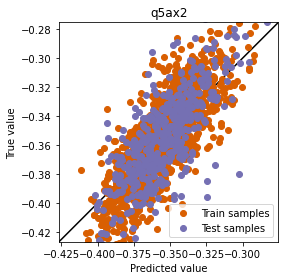

Train R2 score: 0.9073595052895725
Test R2 score: 0.7751784491390538


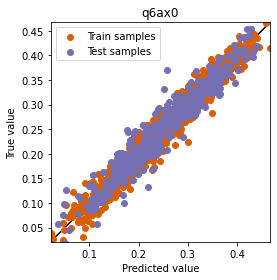

Train R2 score: 0.9313482577483155
Test R2 score: 0.7974207506560548


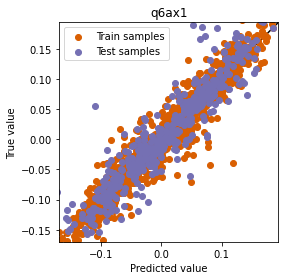

Train R2 score: 0.8580965080977008
Test R2 score: 0.8416026093476374


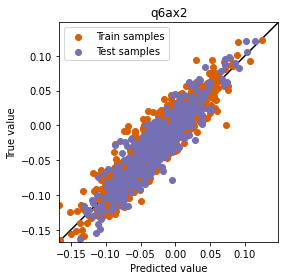

Train R2 score: 0.7908562894311917
Test R2 score: 0.7254749390030067


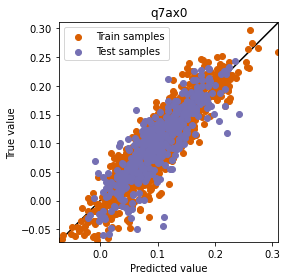

Train R2 score: 0.7391991638623172
Test R2 score: 0.6971452379078975


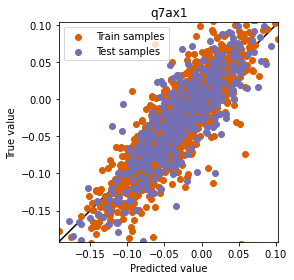

Train R2 score: 0.8571898402756541
Test R2 score: 0.7423320388339636


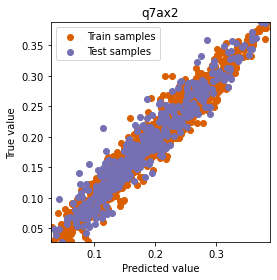

Train R2 score: 0.8140856414692795
Test R2 score: 0.7230187046859506


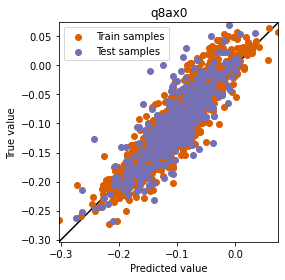

Train R2 score: 0.7547099064114944
Test R2 score: 0.677476169955108


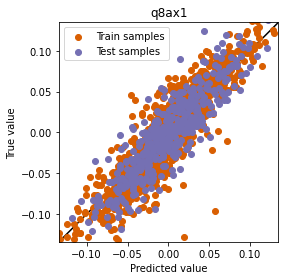

Train R2 score: 0.7779784830664329
Test R2 score: 0.7493589747485292


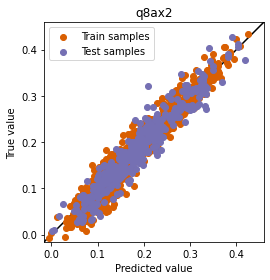

Train R2 score: 0.7794269735653827
Test R2 score: 0.7062417812573761


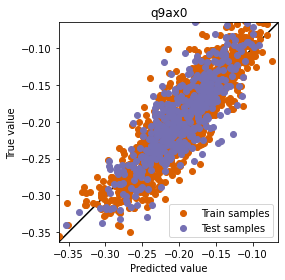

Train R2 score: 0.6439279965410092
Test R2 score: 0.6101740505241984


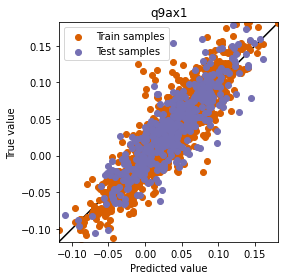

Train R2 score: 0.8149854489498602
Test R2 score: 0.7166305793470433


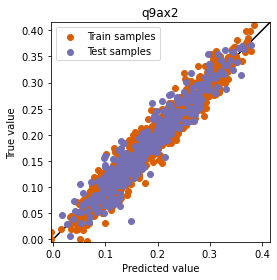

In [45]:
X = uptri_df

RANDSTATE = 0

# a kernel for each axis of each charge 
alpha = 5e-4

for charge in range(10):
    keys = []
    for axis in range(3):
        keys.append(f"q{charge}ax{axis}")
        
    y = lcs_df[keys].to_numpy()
    for ax in range(3):
        y[ax] = scale_min_max(y[ax],y[ax])

    X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=RANDSTATE)

    kernel = RBF() 
    method = KernelRidge #GaussianProcessRegressor
    model = KernelRidge(
        alpha=alpha,
        kernel=kernel,
        # random_state=RANDSTATE
    ).fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
   
    for i in range(3):
        print("Train R2 score:", sklearn.metrics.r2_score(y_train[:,i], train_predictions[:,i]))
        print("Test R2 score:", sklearn.metrics.r2_score(y_test[:,i], test_predictions[:,i]))        

        plt.scatter(train_predictions[:,i], y_train[:,i], label="Train samples", c='#d95f02')
        plt.scatter(test_predictions[:,i], y_test[:,i], label="Test samples", c='#7570b3')
        plt.xlabel("Predicted value")
        plt.ylabel("True value")
        plt.legend()

        xmin =  min(train_predictions[:,i])
        xmax = max(train_predictions[:,i])

        plt.plot([xmin, xmax], [xmin, xmax], c='k', zorder=0)
        plt.xlim([xmin, xmax])
        plt.ylim([xmin, xmax])
        plt.title(keys[i])

        plt.tight_layout()
        plt.gca().set_aspect('equal')
        plt.show()
